# Vectorization with Numpy

This tutorial will give you a brief introduction to vectorization and how Numpy helps in this process. 
Let's get started!

In [1]:
!git clone https://github.com/SanVik2000/EE5179-Final.git

fatal: destination path 'EE5179-Final' already exists and is not an empty directory.


## 1 - Building basic functions with numpy ##

Numpy is the main package for scientific computing in Python. It is maintained by a large community (www.numpy.org). In this exercise you will learn several key numpy functions such as np.exp, np.log, and np.reshape. You will need to know how to use these functions for future assignments.

### 1.1 - sigmoid function, np.exp() ###

Before using np.exp(), you will use math.exp() to implement the sigmoid function. You will then see why np.exp() is preferable to math.exp().

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="https://raw.githubusercontent.com/SanVik2000/EE5179-Final/main/Tutorial2/Sigmoid.png" style="width:500px;height:228px;">

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

In [2]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+math.exp(-x))
    ### END CODE HERE ###
    
    return s

In [3]:
basic_sigmoid(3)

0.9525741268224334

**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** basic_sigmoid(3) **</td> 
        <td>0.9525741268224334 </td> 
    </tr>

</table>

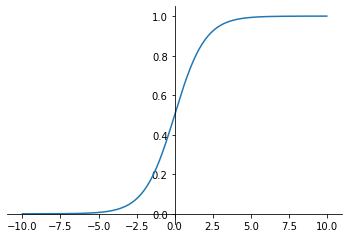

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_list = []
y_list = []
for x in np.arange(-10.0, 10.1, 0.1):
    x_list.append(x)
    y_list.append(basic_sigmoid(x))

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.plot(x_list, y_list)
plt.show()


Actually, we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful. 

In [5]:
### One reason why we use "numpy" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: ignored

In fact, if $ x = (x_1, x_2, ..., x_n)$ is a row vector then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [6]:
import numpy as np

# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

In [7]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


Any time you need more info on a numpy function, we encourage you to look at [the official documentation](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.exp.html). 

**Exercise**: Implement the sigmoid function using numpy. 

**Instructions**: x could now be either a real number, a vector, or a matrix. The data structures we use in numpy to represent these shapes (vectors, matrices...) are called numpy arrays. You don't need to know more for now.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [8]:
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(np.exp(-x) + 1)
    ### END CODE HERE ###
    
    return s

In [9]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

**Expected Output**: 
<table>
    <tr> 
        <td> **sigmoid([1,2,3])**</td> 
        <td> array([ 0.73105858,  0.88079708,  0.95257413]) </td> 
    </tr>
</table> 


### 1.2 - Sigmoid gradient

As you've seen in lecture, you will need to compute gradients to optimize loss functions using backpropagation. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [10]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    s = sigmoid(x)
    ds = s*(1-s)
    ### END CODE HERE ###
    
    return ds

In [11]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


**Expected Output**: 


<table>
    <tr> 
        <td> **sigmoid_derivative([1,2,3])**</td> 
        <td> [ 0.19661193  0.10499359  0.04517666] </td> 
    </tr>
</table> 



### 1.3 - Reshaping arrays ###

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="https://raw.githubusercontent.com/SanVik2000/EE5179-Final/main/Tutorial2/image2vector_kiank.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [12]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
    ### END CODE HERE ###
    
    return v

In [13]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Expected Output**: 


<table style="width:100%">
     <tr> 
       <td> **image2vector(image)** </td> 
       <td> [[ 0.67826139]
 [ 0.29380381]
 [ 0.90714982]
 [ 0.52835647]
 [ 0.4215251 ]
 [ 0.45017551]
 [ 0.92814219]
 [ 0.96677647]
 [ 0.85304703]
 [ 0.52351845]
 [ 0.19981397]
 [ 0.27417313]
 [ 0.60659855]
 [ 0.00533165]
 [ 0.10820313]
 [ 0.49978937]
 [ 0.34144279]
 [ 0.94630077]]</td> 
     </tr>
    
   
</table>

### 1.4 - Broadcasting ###

Consider a weight matrix of shape (1, 12288) and an image of shape (209, 12288). This means that the input has 209 image samples with each sample described by 12288 pixels.

For one example $x^{(i)}$:
$$z^{(i)} = x^{(i)} w^T + b \tag{1}$$

Now, the shape of $x^{(i)} w^T$ is (209, 1) which means it has 209 rows and each row has 1 learned representation for that image sample. Ideally, the shape of the bias term should now be (209, 1) in order to facilitate the addition of $x^{(i)} w^T$ and $b$. This is illustrated as follows:

In [14]:
w = np.random.rand(1, 12288)
img = np.random.rand(209, 12288)
b = np.random.rand(209, 1)
out = np.dot(img, w.T)
print("Out Shape : " , out.shape)
out = out + b
print("Out Shape (after bias) : " , out.shape)

Out Shape :  (209, 1)
Out Shape (after bias) :  (209, 1)


However, Numpy has an interesting feature called **Boradcasting**. Subject to certain constraints, the smaller array is **“broadcast”** across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

In [15]:
w1 = np.random.rand(1, 12288)
img1 = np.random.rand(209, 12288)
b1 = 0
out1 = np.dot(img1, w1.T)
print("Out Shape : " , out1.shape)
out1 = out1 + b1
print("Out Shape (after bias) : " , out1.shape)

Out Shape :  (209, 1)
Out Shape (after bias) :  (209, 1)


## 2) Vectorization


In deep learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is  computationally efficient, you will use vectorization. For example, try to tell the difference between the following implementations of the dot/outer/elementwise product.

In [16]:
import time

x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
start_time = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
end_time = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
start_time = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
end_time = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
start_time = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
end_time = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
start_time = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
end_time = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

dot = 278
 ----- Computation time = 0.08811000000008562ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [17]:
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
start_time = time.process_time()
dot = np.dot(x1,x2)
end_time = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### VECTORIZED OUTER PRODUCT ###
start_time = time.process_time()
outer = np.outer(x1,x2)
end_time = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
start_time = time.process_time()
mul = np.multiply(x1,x2)
end_time = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
start_time = time.process_time()
dot = np.dot(W,x1)
end_time = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(end_time - start_time)) + "ms")

dot = 278
 ----- Computation time = 0.18894899999999382ms
outer = [[81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [63 14 14 63  0 63 14 35  0  0 63 14 35  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [81 18 18 81  0 81 18 45  0  0 81 18 45  0  0]
 [18  4  4 18  0 18  4 10  0  0 18  4 10  0  0]
 [45 10 10 45  0 45 10 25  0  0 45 10 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
 ----- Computation time = 0.14911200000033986ms
elementwise multiplication = [81  4 10  0  0 63 10  0  0  0 81  4 25  0  0]
 ----- Computation time = 0.08345100000006767ms
gdot = [23.17378437 16.65363516 32.698362

As you may have noticed, the vectorized implementation is much cleaner and more efficient. For bigger vectors/matrices, the differences in running time become even bigger. 

**Note** that `np.dot()` performs a matrix-matrix or matrix-vector multiplication. This is different from `np.multiply()` and the `*` operator (which is equivalent to  `.*` in Matlab/Octave), which performs an element-wise multiplication.

### 2.1 Implement the L1 and L2 loss functions

**Exercise**: Implement the numpy vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [18]:
# GRADED FUNCTION: L1
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    loss = sum(abs(yhat - y))
    ### END CODE HERE ###
    
    return loss

In [19]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 1.1


**Expected Output**:

<table style="width:20%">
     <tr> 
       <td> **L1** </td> 
       <td> 1.1 </td> 
     </tr>
</table>


**Exercise**: Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$. 

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [20]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    x = yhat - y
    loss = np.dot(x,x)
    ### END CODE HERE ###
    
    return loss

In [21]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.43


**Expected Output**: 
<table style="width:20%">
     <tr> 
       <td> **L2** </td> 
       <td> 0.43 </td> 
     </tr>
</table>